# 제 4장 데이터 전처리
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/blob/main/%EC%A0%9C4%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC/Ch%204.ipynb)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

In [1]:
# !pip install pandas==1.1.2
import pandas as pd
# print(pd.__version__)
import sklearn
# print(sklearn.__version__)
import numpy as np
# print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
# print(sns.__version__)

### 이상치 확인

In [19]:
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

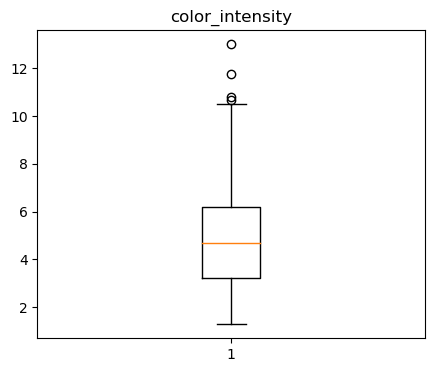

In [20]:
# 이상치 확인1
plt.figure(figsize=(5,4))
plt.boxplot('color_intensity', data=wine, whis=1.5)
plt.title('color_intensity')
plt.show()

In [21]:
# 이상치 확인2
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제

In [17]:
# 이상치 제거
drop_outliers = wine.drop(index=outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [22]:
# 이상치 대체
# 이상치를 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

# NaN이 된 이상치를 평균값으로 변경
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

### 범주형 변수 처리

In [25]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [27]:
iris_dummy = pd.get_dummies(iris, 'Class')
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### 데이터 분할
[[sklearn] 'stratify'의 역할(train_test_split)](https://yeko90.tistory.com/entry/what-is-stratify-in-traintestsplit)

In [29]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'), iris['Class'], test_size=0.2, random_state=1004)
print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [30]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [31]:
y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: Class, dtype: object

In [32]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [33]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [34]:
# stratify 설정
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris.Class)
print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [36]:
y_train.value_counts()

Setosa         40
Versicolour    40
Virginica      40
Name: Class, dtype: int64

### 데이터 스케일링

In [38]:
# standard scaler
# 평균 0, 분산 1인 정규분포로 스케일링
# 최솟값, 최댓값 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용 권장
# 회귀 < 분류
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.04, 3.03) (-0.00, 1.00)
Test_scaled (-2.51, 1.87) (-0.19, 0.99)


In [39]:
# min-max scaler
# 0과 1 사이 값으로 스케일링
# 이상치에 매우 민감하므로 이상치를 미리 정제한 후 수행
# 회귀 > 분류
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.44, 0.27)
Test_scaled (-0.09, 0.92) (0.40, 0.26)
